In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
data= pd.read_csv("Data_random_1.csv")
data2= pd.read_csv("Data_random_1.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,13])

In [6]:
x = data2
y = data.Deformation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


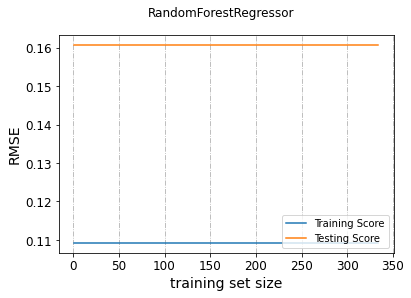

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from math import sqrt
nums=np.arange(1,335,step=1)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
testing_scores=[]
training_scores=[]
for num in nums:
    regr=ensemble.RandomForestRegressor(n_estimators=num, max_depth=5, min_samples_split=2, min_samples_leaf=25, max_features=5, random_state=42)
    regr.fit(x_train,y_train)
    y_train_predicted = regr.predict(x_train)
    y_test_predicted = regr.predict(x_test)
    training_scores.append(sqrt(mean_squared_error(y_train,y_train_predicted)))
    testing_scores.append(sqrt(mean_squared_error(y_test,y_test_predicted)))
ax.plot(nums,training_scores,label="Training Score")
ax.plot(nums,testing_scores,label="Testing Score")
ax.set_xlabel("training set size")
ax.set_ylabel("RMSE")
ax.legend(loc="lower right")
#ax.set_ylim(-1,2)
plt.suptitle("RandomForestRegressor")
# 設定 X 軸的網格線，風格為 點畫線
plt.grid(axis='x',linestyle='-.')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
model=RandomForestRegressor(n_estimators=335,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
def plot_learning_curves(model, x, y):
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


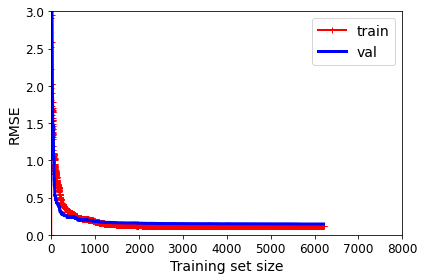

In [12]:
model=RandomForestRegressor(n_estimators=335,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
plot_learning_curves(model, x, y)
plt.axis([0, 8000, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()        